<a href="https://colab.research.google.com/github/Nathan-oc/Estudos-DSNP/blob/main/Wordlcloud_em_Python_R%C3%89PLICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Réplica do notebook do Carlos Melo

In [ ]:
!pip install wordcloud -q

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image 
import csv
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# importar dados
df = pd.read_csv('/content/sample_data/listings.csv')

# eliminar linhas com valores ausentes da coluna summary 
desc = df.dropna(subset=['description'], axis=0 )['description']

In [ ]:
# exemplos de descriçõs de imóveis
display(desc.iloc[13])
display(desc.iloc[69])
display(desc.iloc[420])

'Belíssimo apartamento de 2 quartos frente ao posto 9 na orla da praia do Recreio podendo receber até 5 pessoas.<br />Os hóspedes poderão contar com uma estadia de localização privilegiada perto de restaurantes, bares e padaria, tudo próximo podendo chegar até estes locais caminhando pela Orla.<br />Certo que sua família ou amigos vão viver bons momentos nesta estadia além de estarem próximos a praia.<br /><br />@MyStay_Brasil'

'Studio apartment with garden and awesome views  on a quiet cul-de-sac street in the artsy Santa Teresa neighborhood, with a park and cultural centre right across the street.  Owned by A Brazilian-Canadian couple. Local Rio de Janeiro at its best!<br /><br /><b>The space</b><br />A studio apartment on Rua Murtinho Nobre in Santa Teresa is available for short term rentals. The studio is owned by a Brazilian-Canadian couple who work in the arts. It has a bathroom with large shower and kitchenette with all the basics. The apartment overlooks a garden which guests are free to use, boasting hibiscus plants and a pitanga tree and flanked by jambu and avocado trees. The garden has an outdoor shower for cooling off on hot summer days. As we are on a hill, the apartment has a fabulous view of greenery as well as of the Centro, arches of Lapa, Cathedral, Bay of Guanabara & bridge to Niteroi. The studio has been a home away from home for visiting journalists, musicians, architects, as well as to 

'Cozy flat located between Copacabana and Ipanema!<br />Now with air conditioner in the living room.<br /><br />Live like a "Carioca"! Lord Byron’s apartment is located nearby the astonishing Copacabana, Arpoador and Ipanema beaches. In a walking distance, you will be able to reach the best restaurants, shops, and spots in Rio!<br />Easy access to public transportation.<br /><br />High cleaning standard <br />We take cleaning seriously. We follow all the recommended protocol  by Airbnb.<br /><br /><b>The space</b><br />"In addition to being fully air conditioned to relieve the heat of Rio de Janeiro in summer, the apartment is a gem. It has beautiful high ceilings, wood parquet floors and classic craftsman doors with glass knobs, with a fully renovated kitchen and bathroom. Perfect mix of classic style and new conveniences. It is decorated beautifully, and it\'s clear Monica has put care and love into it. <br />Location: The location is fabulous, right in between Copacabana and Ipanema

In [ ]:
desc.head()

0    suntuoso apartamento de frente para o mar <br ...
1    Flat luxuoso com a melhor localização do Rio d...
2    A 15 min. do complexo esportivo de Deodoro, Ca...
3    Iate Intermarine 440 Full Gold c/ Fly p/ até 1...
4    Estou oferecendo minha casa ,minha família meu...
Name: description, dtype: object

In [ ]:
type(desc)

pandas.core.series.Series

In [ ]:
# concatenar as palavras
all_desc = " ".join(s for s in desc)

len(all_desc), type(all_desc)

(15834444, str)

In [ ]:
# definir stopwords (palavras que não são caracteristicas)
stopwords = set(STOPWORDS)
stopwords.update(['de', 'para', 'o', 'a', 'do', 'da', 'com', 'em', 'os', 'as', 'ao', 'aos', 'br',
                  'to', 'b', 'the', 'space', 'guest', 'access'])

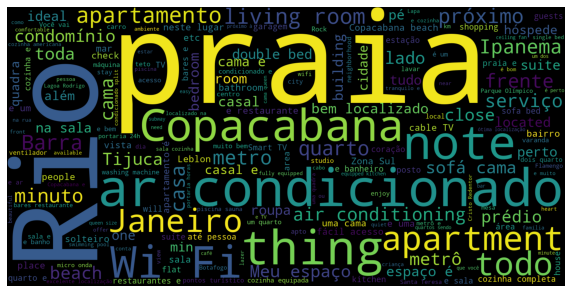

In [ ]:
# gerar uma wordcloud

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=1600, height=800).generate(all_desc)

#mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file('airbnb wordcloud-descrição.png')

In [ ]:
for i in range(50):
  display(desc.iloc[i])

'suntuoso apartamento de frente para o mar <br />a melhor vista para o mar <br />1 por andar <br />3 suites <br />majestosa sala <br />cozinha completa <br />wi-fi'

'Flat luxuoso com a melhor localização do Rio de Janeiro, com sua vista de tirar o folego, na Avenida Vieira Souto, conta com complexa infra-estrutura de HOTEL, para proporcionar Momentos Mágicos na cidade Maravilhosa, o RIO DE JANEIRO!<br /><br /><b>The space</b><br />Flat Luxuoso, Pronto para você desfrutar da melhor maneira possível!! Conta com serviço de limpeza diário, Lavanderia ( custo adicional ), e sem Dúvidas a Melhor localização e visual do RIO DE JANEIRO!!<br /><br /><b>Guest access</b><br />Restaurante, Cobertura com Piscina, Play com Sauna, Hidromassagem, Squash e Academia!'

'A 15 min. do complexo esportivo de Deodoro, Casa com 02 quartos  disponíveis, ampla sala, TV a cabo  todas as dependências, wi fi, cozinha e banheiro compartilhados, ar condicionado, café da manhã incluso e a combinar refeições e carro com motorista.<br /><br /><b>The space</b><br />Ambiente familiar<br /><br /><b>Guest access</b><br />A todas as dependências<br /><br /><b>Other things to note</b><br />A casa pode ser compartilhada com até 12 pessoas e estaremos prontos para ajudar no que for preciso e dentro da necessidade de cada um e o ambiente é totalmente familiar.'

'Iate Intermarine 440 Full Gold c/ Fly p/ até 12 pessoas, c/ ar condicionado, 1 suíte master, 1/4, dois banheiros, salão c/ mesa centro, poltronas, TV, Wi-fi, som blouthouf, cozinha completa c/ freezer, geladeira,  micro-ondas, fogão, e cafeteira, ampla proa, popa c/ mesa e assentos, fly amplo c/ assentos, equip. básicos p/ mergulho, jogos, churrasqueira à carvão e elétrica. períodos horas c/ 2 tripulantes, combustível incluído, e cooler p/bebidas. Caso ocupado, disponibilizamos outra embarcação!<br /><br /><b>The space</b><br />Os visitantes poderão desfrutar durante 6 horas de bons mergulhos nas limpas águas das ilhas Cagarras, ou degustar sa delícias dos pratos de restaurantes na Praia de Itaipú servidos no barco, ou apreciar os pontos turísticos  na baía  de Guanabara, Cristo  Redentor, bonzinho, e Praia Vermelha.<br />Poderá optar também pelo completo de churrasco levando apenas a carne!<br /><br /><b>Guest access</b><br />O acesso ao barco será pela Marina da Glória, que fica à 1

'Estou oferecendo minha casa ,minha família meus  animais  2quartos,sala cozinha e banheiro.<br /><br /><b>The space</b><br />Temos um terreno e churrasqueira'

'Locação de lindo Flat espaçoso e moderno no Centro de Duque de Caxias. O espaço possuí cozinha composta de microondas, armários e frigobar, varanda e Wi-Fi em toda área. Todo mobiliado, o Apartamento está muito bem localizado no Centro da cidade de Duque de Caxias, próximo a Shoppings, faculdades, academias e comércio em geral. Excelente opção para quem quer conforto e praticidade, mas  não dispensa o bom gosto. <br /><br />Venha ser feliz no seu Flat!!'

'<b>Guest access</b><br />acesso .a todas as dependências do hotel. quarto particular do proprietário. sinta- se em casa.<br /><br /><b>Other things to note</b><br />Apart-hotel  com piscina sauna sala de reunião restaurante academia garagem coberta segurança. <br />tudo para curtir descansar e executivo a trabalho. centro de itaguaí.  frente a rodoviária da cidade.'

'Um espaço bom para família. Com uma vista linda para Lagoa de marica. Uma piscina 4 suítes churrasqueira grande. Espaço lazer . Repouso e descanso. Garagem para até 8 carros. Lugar de paz<br /><br /><b>The space</b><br />o espaço é grande com Boa área verde . Perto de uma bela Lagoa <br />espaço Bom pra descanso. <br />bom para um churrasco em família. <br />ótimo lugar pra relaxar ..<br /><br /><b>Guest access</b><br />os hóspedes podem usar todas as dependência...'

'LINDO APARTAMENTO COM VISTA PARA O MAR. TEM CAPACIDADE PARA ATÉ 4 PESSOAS CONFORTÁVEIS. QUARTO E SALA SENDO O QUARTO COM CAMA DE CASA E UM SOFÁ CAMA CASAL NA SALA. O BANHEIRO TEM UM CHUVEIRO SENSACIONAL. COZINHA AMERICANA BEM EQUIPADA. AR CONDICIONADO NO QUARTO E VENTILADOR DE PÉ NA SALA.<br />TEM MÁQUINA DE LAVAR COM BOA CAPACIDADE.<br /><br /><b>The space</b><br />APARTAMENTO REFORMADO DE FRENTE PARA A PRAIA E EXCELENTE LOCALIZAÇÃO<br />TEM SUPERMERCADO RESTAURANTE FARMACIA E SHOPPING BEM PERTINHO<br /><br /><b>Guest access</b><br />ÁREA DE LASER COM PISCINA E ACADEMIA<br /><br /><b>Other things to note</b><br />o apartamento tem:<br />cozinha com geladeira, fogão, forno com função gril forno e microondas, utensílios de cozinha<br />sala com sofácama,  TV smart, ventilador<br />quarto com ar condicionado, cama Queen e armário <br />varanda com sofá redondo e rede<br />banheiro com  excelente chuveiro,  pia para lavar roupas, varal<br />roupas de cama e banho tmb estão a disposição'

'Meu espaço é próximo da UFRJ, ilha do fundão. Aqui você estará perto do aeroporto, tem atividades para família, pequenos comércios, praça de alimentação, parque infantil, bares, a praia de Copacabana fica cerca de 30 minutos de carro e há transporte gratuito dentro do campus.<br />Você vai amar meu espaço! Ambiente familiar, bem ao estilo mineiro de ser.<br />Segurança, bem-estar e encantos em uma charmosa ilha carioca!<br />Ideal para quem vem estudar na UFRJ ou passear.<br />Te esperamos nessa agradável visita!<br /><br /><b>The space</b><br />Quarto com cama de solteiro, colchão, guarda roupa e mesa de cabeceira.<br /><br /><b>Guest access</b><br />Acesso a todos os cômodos da casa.<br /><br /><b>Other things to note</b><br />Habitam 2 adultos, 1 criança de 9 anos e 1 cachorro porte pequeno.'

"Cobertura moderna, toda revitalizada, impecável,  com vista para mar frontal dos 3 quartos e 2 salas, ambientes climatizados com cozinha equipada com utensílios completos, espaço gourmet multiuso, inclusive com churrasqueira na parte superior com toldo retrátil. A sala inferior possui TV de 60'' modelo 4K interligada a internet,  quartos e sala superior com TV à cabo. <br />Condomínio com estrutura completa,  possuindo 2 praias, piscina oceânica, quadras esportivas, saunas,  várias piscinas, ofurôs.<br /><br /><b>The space</b><br />Período de Ano Novo,  Carnaval, alta temporada e Feriados os preços são diferenciados,  favor consultar.<br /><br /><b>Guest access</b><br />irrestrito o acesso e caso interesse tenho embarcação 31 pés, nova, para locação com marinheiro e combustível para passeios a combinar.<br /><br /><b>Other things to note</b><br />Passeio de lancha para os hóspedes,  termos e preços a parte devem ser discutidos com o anfitrião.  Passeio saindo da Marina Porto Real Reso

'Pousada em Itaguaí, 1,5 km do Centro, 2Km da Thernium, atendemos empresas para alojamento.'

'Bem vindos: não fazemos EVENTOS!<br /><br />Please do not make reservations before send me message to confirme AVAILABILITY. <br /><br />O boutique home localizado na ponta do Joá em uma villa cinematográfica com vista única e exclusiva para as ilhas e 360 graus de mar, praia, montanha. Temos diversos serviços dentro de pacotes de hospedagem ou mini receptivos até 20 paz.<br /> NAO FAZEMOS EVENTO/festa! <br />hotspot queridinho das celebs, marcas famosas e quem curte natureza com modernidade e serviço impecável. 🔑🍀<br /><br /><b>The space</b><br />Atenção: o anúncio se refere à casa principal e não inclui o loft dentro da mesma propriedade! <br /><br />São 4 acomodações sendo 1 suíte master, 1 suíte, 2 quartos com cama de casal e 2 bicamas no andar 2 com vista para o oceano e sensação de estar em um navio.<br />Andar 1 temos sala de estar, sala de jantar, área externa e cozinha / lavabo. <br /><br />Andar -1 temos área com sauna, banheiros e o loft que não faz parte deste anúncio com 

'Belíssimo apartamento de 2 quartos frente ao posto 9 na orla da praia do Recreio podendo receber até 5 pessoas.<br />Os hóspedes poderão contar com uma estadia de localização privilegiada perto de restaurantes, bares e padaria, tudo próximo podendo chegar até estes locais caminhando pela Orla.<br />Certo que sua família ou amigos vão viver bons momentos nesta estadia além de estarem próximos a praia.<br /><br />@MyStay_Brasil'

'Perfeito para grupos que querem curtir as praias de Copacabana, Ipanema , Arpoador, tomar um café no Forte de Copacabana, aproveitar a ciclovia para passeios de patins, bicicleta , patinete....muitos restaurantes, bares...tudo muito perto, tudo a pé!!<br /><br /><b>The space</b><br />Os 4 quartos são independentes, todos com banheiro. uma sala  com microondas, geladeira, cafeteira elétrica, pratos talheres, copos possibilitando preparar um café da manhã, fazer lanches....<br /><br /><b>Guest access</b><br />Na quadra ao lado do prédio , dois estacionamentos pago e metrô a 8min. a pé.<br />Mas'

'Amplo apartamento  com exuberante vista para o mar.  Basta atravessar a rua para usufruir do que a praia do leblon tem de melhor. Otima localização,  apenas há alguns metros de bares, restaurantes, farmácias,  supermercados, etc. O apartamento também é próximo do metrô, fica há uns 10 minutos de caminhada.  Temos WiFi de 120 Mbps.  Para quem desejar, temos uma mesa com Internet cabeada em uma das salas, que pode ser utilizada de escritorio. Basta plugar seu notebook no cabo para conectar<br /><br /><b>The space</b><br />O apartamento conta com três amplas salas, sendo uma de tv, a outra de almoço/jantar e a terceira um escritório,  podendo também ser utilizada para confraternizar e fazer refeições,  já que tem outra mesa nela. Temos apetrechos basicos de cozinha, tais como panelas, pratos,  talheres, potes, travessas, microondas, liquidificador, etc . temos duas geladeiras no imóvel, uma na cozinha e outra na sala de tv. Para quem desejar vir de carro, temos duas vagas de garagem.  Os

'Ótimo ambiente residencial, lugar tranquilo, entrada independente, fácil acesso com Zona Sul, e toda a cidade .<br />Se está em um intercâmbio, transferido, estudando ou de férias, nós temos a solução.<br />Casa mobiliada com móveis de<br /><br /><b>The space</b><br />O espaço é tem entrada independente, com uma vista para o centro do Rio, com total disponibilidade de usufruto dos hospedes.<br /><br /><b>Guest access</b><br />Os hóspedes tem acesso a todos os cômodos da casa e a área comum.<br /><br /><b>Other things to note</b><br />É importante que os hospedes sigam as regras de uso do espaço para que haja o melhor aproveitamento e não afete a estadia.'

'O quarto Leblon da Mansão Lissandron é um dos 4 quartos com a mais bela vista para o mar. O quarto é extremamente aconchegante, claro, ventilado, e tem colchões de primeira linha além do ar condicionado. Com apenas um 3 lances de escadas o quando tem banheiro privativo sento assim uma linda suíte. Aceita cama adicional  ou reservas de mais quartos na mansão.<br /><br /><b>The space</b><br />A Jacuzzi da Mansão cobra uma taxa adicional a cada utilização. E a cozinha é restrita à todos os hóspedes.'

'The apartment is between the posts 3 and 4 of Barra beach. Excellent trade around: restaurants, bars, pharmacy, supermarkets, shopping malls. <br />Itaú bikes across the coast for a delightful ride.'

'<b>The space</b><br />Accommodation for 2 people in front of the beach. Apt  with 1 bedroom, 1 bathroom, kitchen, living room and wonderful terrace, parking place. <br />Apartment is fully equipped, has air conditioning, sofa bed for two persons in living room, normal bed, swimming pool, sauna,ecc..'

'O quarto Leblon é o último quarto da Mansão Lissandron e conta com uma calma de solteiro +auxiliar, banheiro privativo e uma vista espetacular, além de máxima privacidade. A suíte é aconchegante e tem ar condicionado, um local para você descansar e sentir- se extremamente à vontade!<br /><br /><b>The space</b><br />A Jacuzzi da Mansão cobra uma taxa adicional a cada utilização. E a cozinha é restrita à todos os hóspedes.'

"This guest house is situated in a small community overlooking Copacabana - you are welcome to stay with this local Carioca (Rio) family who have lived here for generations.  Breakfast on the terrace is included in the price for 2 guests. Welcome!<br /><br /><b>The space</b><br />Bed and breakfast situated in the community of Babilonia, Copacabana.  There is friendly and has amazing views of the world's most iconic beach - Copacabana.<br /><br />Your host Thiago and his family welcome tourists from far and away, language students looking for a homestay, NGO workers and Brazilians alike - everyone is welcome in our colourful home.<br /><br />- IN SUITE TWIN BEDROOM PERFECT FOR COUPLES OR PAIRS OF TRAVELLERS<br />- DOUBLE ROOM<br />- ROOF TOP TERRACE WITH HAMMOCKS AND STUNNING VIEWS TO THE SEA & BEACH & CRISTO REDENTOR<br />- FREE WIRELESS INTERNET<br />- VENTILADOR<br />- FRIENDLY BRAZILIAN FAMILY AS HOSTS (English speaking)<br />- NO DEPOSIT<br /><br />This bed and breakfast boasts the

'O apto totalmente reformado , são 4 suítes  , banheiros brancos , cozinha ampla,lavanderia, na barra da Tijuca , de frente p mar.<br />Sala ampla, lavabo ,varanda espaçosa, ar condicionado em todos os cômodos. Restaurantes ,hotéis,padarias  e bares ao redor, podendo fazer passeios a pé.<br /><br /><b>The space</b><br />Este apartamento foi comprado para minha família passar finais de semana e feriados . Não moramos no apartamento. Usamos somente para lazer. Quando compramos ,foi completamente reformado , usamos materiais de primeira qualidade, tudo está completamente novo . O prédio é de frente para o Mar , poucos apartamentos , prédio bem calmo . Primeiro andar.<br />Ao redor do apartamento, vc pode ir andando aos melhores hotéis da barra da tijuca , ótimos restaurantes , bares , e supermercados e padarias .<br />Praia limpa e maravilhosa.<br />Na frente do Posto 3 .<br /><br /><b>Guest access</b><br />Os hóspedes poderão usufruir de uma estadia confortável , com todo o conforto de q

'Casa com dois quartos, os quartos um com a janela pro corredor da casa outro com a janela fechada por ser muito próximo a outra residência, mas ambos com ar condicionado, local tranquilo sem barulho e aconchegante em lugar tranquilo próximo ao centro da cidade de Itaguaí, rodoviária, mercado, hotéis, tudo muito próximo, 20 min das praias é cachoeiras.<br /><br /><b>The space</b><br />Casa aconchegante com dois quartos, próximos mercado, hotéis, rodoviária etc<br /><br /><b>Guest access</b><br />Quintal para colocar 2 carros , que é compartilhado com a casa de baixo onde mora Sônia, senhora muito gentil, pronta a ajudar, uma escada para subir para a residência, com uma varanda na entrada bem fresco e a casa com a estrutura já fescrita<br /><br /><b>Other things to note</b><br />Casa segundo piso, bairro tranquilo, próximo do centro da cidade.'

'Apartamento de 2 dormitórios, muito aconchegante, arejado. Os hóspedes que tiverem atestado médico, podem usar a piscina do condomínio, sauna, academia. Com aviso prévio, podem reservar as churrasqueiras.<br /><br /><b>The space</b><br />Local seguro com vigilância 24 horas. Hóspedes podem usufruir de toda área de lazer oferecida pelo condomínio. Campos de futebol, quadra de tênis, salas de cinemas, Wifi por todo o condomínio, piscina com guarda-vidas, piscina infantil, Sauna ofurô... única exigência é estarem com atestado médico dentro da validade.<br /><br /><b>Guest access</b><br />Piscina, ofurô, academia, quadra de futebol, tênis etc... desde que portem atestado médico.<br /><br /><b>Other things to note</b><br />Estamos a 2 km da praia do Recreio dos Bandeirantes, próximo a Hortifruit, padaria, drogaria.'

"Cozy and stylish, this flat is located in one of the most residential streets in Ipanema, at Rua Joaquim Nabuco, very close to the luxurious hotel Fasano<br /><br /><b>The space</b><br />With an area of 377 sq. Ft, it is only one minute walking distance from the beach and one block from the Vieira Souto, near the subway station General Osório, restaurants, supermarkets, bakeries, bars, pharmacies, and all trade of the Neighborhood, close to the upscale 5 stars Fasano hotel. It is also just 5 minutes walking distance from the most noble area of Copacabana (Posto 6). A perfect location for those who want to live a unique moment in this wonderful city.<br />The property has capacity for up to 6 people and is equipped with two single beds, plus two extra beds, a sofa bed super comfortable that turns into a beautiful and comfortable double bed, air conditioning with 21,000 BTU's, TV Led 47 ', Cable TV, Wi-fi broadband, fridge, washing machine and tumble dryer, iron, cook top stove, microwa

'Cobertura com Visual deslumbrante de todo o mar da barra até onde sua vistas alcançarem. <br />você tem vista do nascer-do-sol e do pôr-do-sol. Maravilhoso.<br />Confortável 3 quartos com 3 vagas de garagem, piscina aquecida, sauna e churrasqueira.'

'Sala de estar, jantar, cozinha / geladeira/ filtro/ maquina lavar louça/forno de microondas.3 Quartos sendo 1suíte todos com ar split, TVs e wife .Localizado em frente ao Pq. Garota de Ipanema (100m e está no mar). Silencioso e prédio c/porteiro 24h.<br /><br /><b>The space</b><br />A suíte possuo banheira de hidromassagem.<br />Os quartos são silenciosos, porém 2 deles se ouve na manhã  barulho de pássaros e micos.<br /><br /><b>Guest access</b><br />Possui roupa de cama é banho para curta temporada. Aluguel mensal a combinar.'

'Entre o posto 9 e 10 , com vista para o mar , um quarto, uma cozinha americana, um banheiro, uma sala é uma varanda, podendo aproveitar também a piscina .'

"Almost Ocean front in Ipanema. It won't get any better than that. On the beach, 2 blocks from the metro, public transit, taxis. Walking distance from all you want to see in Ipanema. All that in a quiet backside unit."

'Suíte em Barra de Guaratiba, para amantes da natureza, para quem curte paisagens e praias deslumbrantes, próximo a famosa Pedra do Telégrafo e acesso das trilhas para as praias selvagens - Praia da Tartaruga, Priai do Meio, Praia Funda, Praia<br />do Inferno, próximo a Praia de Grumari (10mim de carro). Região muito conhecida na prática de stand up paddle (SUP) na Restinga de Marambaia, com diversos que alugam prancha para prática do esporte. Será um prazer recebê-los!'

'Please note that elevated rates applies for New Years and Carnival. Price depends on length of stay and number of people. Contact me, and we will discuss. <br />- Bright and sunny<br />- Large balcony (25 square meters) <br />- High speed WiFi (up to 500MB)<br />- Smart TV (you can watch Netflix etc. if you have an account)<br />- 24h doorman<br />- 1 minute to walk to Copacabana Beach<br />- Silent "split" air conditioning<br />- Best spot in Rio<br /><br /><b>The space</b><br />- Beautiful, sunny 2 bedroom (90 square meters) in 24h doorman building<br />- 1 min. to walk to Copacabana beach<br />- Spacious living room, 2  bedrooms with 2 full-size beds (each sleeps 2)<br />- large balcony which looks out on pedestrian street<br />- no traffic - priceless in Rio (apts with sea view are noisy because of traffic)<br />- "Split" air condition in each room (almost silent like in a hotel)<br />-  Smart TV (you can watch Netflix if you have an account)<br />- close to everything, a stone th

'<b>The space</b><br />Stay in an oceanfront apartment located in a famous Rio landmark! Set in Upper Leblon, "The Zeppelin" mansion was for decades one of the most renowned hotspots in Rio for live music and mingling with Brazilian celebrities. Today it has been converted into a gorgeous tropical albergue\' but it still retains the mystique and charm of its wild glory days. The lush tropical gardens which surround the Zeppelin are the home to many species of birds, butterflies, and tiny monkeys. And the huge upstairs terrace provides one of the best ocean views in the city! This studio apartment has a full ocean view from your own window, a private bathroom, and kitchen. It is just minutes away from all the best nightlife of Ipanema, Copacabana, and Leblon. Buses, vans, and taxis across the street take you everywhere in the city easily.<br />Amenities include:<br />-private outdoor entrance<br />-private bathroom and kitchen<br />-WIFI internet<br />-free gated parking<br />-free acce

"Charming apartment in Ipanema close to the beach.<br /><br />One block away from Ipanema beach with morning sun and partial ocean view.<br /><br />Very airy, the apartment is located on a residential building a few steps from Arpoador.<br /><br /><b>The space</b><br />Cozy and very airy, the apartment is located in a familiar and exclusively residential building just a few steps from Arpoador, Hotel Fasano and several restaurants such as the Astor Restaurant. Many bars and nightclubs are also nearby.<br /><br />Furnished, the apartment has 1 bedroom with double bed (for 2) and a foldable couch-bed (for 2).<br /><br /><b>Guest access</b><br />Everything on the apartment is there for you to use!<br /><br />Also, everything inside the minibar is for your use free of charge as well as the Nespresso.<br /><br /><b>Other things to note</b><br />Most of art work displayed in the apartment it's for sale. You can find the list of items and their prices on the card index inside the right drawer

'Confortável Veleiro Francês Beneatou 43.3 pés<br />Experiência única de contato com a bela natureza do Rio, onde você, sua família e seus amigos viverão  momentos de grande felicidade. <br />Com total segurança e com um Comandante com mais de 30 anos de navegação, levará você  aos melhores passeios aos melhores mergulhos do Rio de Janeiro e a um pôr do sol cinematográfico na Urca.  <br />Momentos de Prazer celebrados com bebidas e petiscos feitos pelo nosso Comandante e Cheff Luciano.<br /><br /><b>The space</b><br />Com três cabines, três banheiros, cozinha, churrasqueira o nosso veleiro proporciona o conforto que você merece. Fazemos de petiscos a pratos elaborados da gastronomia nacional e internacional, assim como famoso risoto de pato a moda Thay.<br /><br /><b>Guest access</b><br />Toda a parte externa da embacação, convés, rede de balanço, espaço lounge do cockpit, duas suites, stand-up, bóias.'

"Apto 2 rooms, block of Copacabana Beach, Posto Seis, near to Copacabana Fort, near to Ipanema, Arpoador, near to restaurants, supermarket, bakery, hair salon, banks, near to get a taxi or bus and metro -subway- vicinity<br /><br /><b>The space</b><br />Of Outer Space: <br />Prime region of South Zone, Posto Seis, in Copacabana, near Copacabana and Ipanema's beach ,  easy access to Arpoador, tourist spot of Rio de Janeiro, close to the restaurants of varying prices, cafeterias, with ease for walking near a Shopping with many shops, kiosks on the beach, nice food and entertainment offerings. <br />Internal space: <br />Furnished apartment with two bedrooms, living room with kitchen, two bathrooms, laundry area. Cozy, airy, with television, refrigerator, stove, freezer, dishes, cutlery, glasses, pots. Ample cabinets for placing clothes, giving comfort to the traveler.<br /><br /><b>Other things to note</b><br />Extremely nice neighborhood, with daytime healthy life, and during the weeken

'My studio is located in the best of Ipanema, two blocks from beach, close to restaurants , boutiques, markets, easy transportation for the whole city: Subway, buses, cabs, bikes., restaurants and coffee shops. You may have all you need to have fun and love the best of Rio.<br />Anti -Covid protocols required : vaccines and mask. <br />During the pandemic time please take care and make sure to arrange in advanced all your tours.<br /><br /><b>The space</b><br />The studio is located at Vinicius de Moraes Street, 2 blocks from <br />Ipanema Beach - Rio de Janeiro / Brasil <br />Ideally located in the heart of the best neighborhood in Rio, this modern studio with fast internet is located very close to the beach from one side and at the other side cofee shops, nice boutiques, restaurants,and the beautiful Rio lagoon. Easy transportation: taxis, subway and buses very close. <br /><br />Best of Rio life style. <br />Gifts to the guests:  New confort queen size bed and extra sound protected 

'Our apartment is a little gem, everyone loves staying there! Best location, 2 blocks to the subway, 3 blocks to the beach, close to bars, restaurants, supermarkets, banks, public transportation, movie theatre and all you need! Wi-fi, cable TV, air con and fan!<br /><br /><b>The space</b><br />This newly renovated studio (last renovations Oct 2016)   is in the best location of Copacabana, situated on a quieter street but just off the main streets, right in the middle of everything, 2 1/2 blocks from the beach, 1 block from the subway (Cantagalo station which places you just a stop away from Ipanema! --> you can just walk there too, no need to hop on the subway really), very close to all local bars and restaurants, and very close to Ipanema and Lagoa (walking distance) where true cariocas exercise in the mornings.<br /><br />The place is colorfully decorated, modern, with lots of natural light, on the 3rd floor of a leafy greet shady street, in the summer it is great, as any shade helps

'The Standard apartments are equipped with air conditioning, 1 double bed, LED tv, Internet WI-FI, digital safe, electronic lock, phone and minibar.'

'ampla casa para veraneio, totalmente equipada, próximo às barcas e comércio, pronta para seu relax.'

'Our newly renovated studio is located in the best part of Copacabana - Between  Posto 5 and Posto 6 - 10 minutes from the Arpoador and Ipanema beach.   Security 24 hours a day.    Enjoy your stay in a family bulding  living as a local people.  Please check the possibility of flexible check-in and check-out times.<br /><br /><b>The space</b><br />FEEL LIKE YOUR HOME LIVING AS "CARIOCA" LOCAL PEOPLE IN A NEW RENOVATED AND  REFURBISHED APARTMENT CAREFULLY PREPARED FOR YOU.  THE APARTMENT IS  VERY CLEAN  IN A  SAFE AND FAMILIAR BUILDING.  ONLY 4 STUDIOS PER FLOOR. MAKE SURE YOU   WILL STAY IN THE BEST PLACE OF COPACABANA -  POSTO 6 - (lifeguard station 6)<br />10 MINUTES WALKING TO ARPOADOR AND IPANEMA. <br /><br />Attention: 1)  All the pictures are surrounding the apartment and not far away.<br />2)  We are pround  super host with also full golden 5 stars in all aspects. We care about your well being.!<br />Packages for Carnival 2020 is available.  Send a message to us.<br />Check in an

'Ipanema, Rio de Janeiro <br />Cidade Maravilhosa<br /><br /><b>Other things to note</b><br />Apartamento espaçoso na Rua Bulhões de Carvalho, entre Ipanema e Copacabana, próximo a estacão do metrô.<br />Sua composição se faz Ideal para família ou 2 casais. Flores e temperos fazem parte da atmosfera no qual o apartamento proporciona, ideal para se desfrutar de uma boa taca de vinho.<br />Localizado em uma rua muito segura, a apenas três quadras da praia de Copacabana (5 minutos caminhando) e três quadras das praias de Ipanema (5 minutos caminhando). Na área sempre há lugares para comer e beber com ruas movimentadas, tornando este bairro muito especial.<br />Você pode acessar facilmente o apartamento a pé, de carro, táxi, metrô e várias linhas de ônibus.<br />Fica próximo a padarias, supermercados, restaurantes, caixas eletrônicos de bancos e das principais ruas comerciais de Copacabana e Ipanema.<br />Este luminoso apartamento localizado, possui portaria 24 horas, 2 amplos quartos e 3 

'cool, 1-2 block from the beach, low season rate'

'Enjoy being part of the Bossa Nova history by staying in the very street where the real-life Girl From Ipanema used to "each day walk to the sea".<br /><br />» Penthouse with side ocean view<br />» Six ensuite bedrooms<br />» 6* Location, first beach-block<br />» Heart of Ipanema<br />» Exceptional comfort<br />» Beachy, modern mid-century style<br />» Designed for digital nomads<br />» Remote-Work ready<br />» Lightning-fast Internet 240m/s<br />» Locally rooted<br />» Experience-driven<br />» Dedicated team<br />» Authentic and unforgettable Rio story<br /><br /><b>The space</b><br />Located on the first beach block, this beachy, modern mid-century styled Penthouse was designed in a thoughtful way for modern travellers.<br /><br />More than having a place to sleep, we understand that guests look for remote-work ready, locally rooted, and experience-driven properties with a dedicated team taking pride in going the extra mile to help our guests live an authentic and unforgettable Rio 

'Apartamento arejado, próximo aos jogos das olimpíadas, acomoda duas pessoas, mobiliado com todo o conforto, bem servido de transporte publico, com academia de ginastica, piscina e sauna'

'Apartamento tem três dormitórios, dois banheiros, sala cozinha lavanderia, bem claro, arejado.Excelente localizaçao coração de Ipanema arpoador e Copacabana,proximo  bares , restaurantes, da praia,metro.Uso de geladeira cafeteira.Roupa cama banho.<br /><br /><b>The space</b><br />Excelente acomodação perto da praia mais famosa do Rio de Janeiro.<br />Apartamento confortável, limpo e organizado.<br />Quarto arejado, com cama de solteiro e banheiro partilhado com mais uma pessoa.<br />Cozinha equipada para refeições rapidas, maquina de lavar; oferecemos roupa de cama e banho.<br /><br />Prédio pequeno e familiar, perto de paradas de ônibus e metrô.<br /><br />Cinco minutos do Arpoador.<br /><br />Região segura, longe das comunidades. Tudo perto,  bares, restaurantes, etc.<br /><br /><b>Guest access</b><br />Os hospedes tem acesso a lavanderia, cozinha para pequenos lanches.rede wi fi.televisão a cabo.<br />Poderão compartilhar a sala de visitas.Nosso banheiro e muito limpo todo branco.<

'Apartamento de  4 quartos, na Av .Atlântica com conforto<br />Todos os quartos com ár condicionado<br />Vista lateral para o mar.<br />.Temos uma suite completa <br />Praia de Copacabana.<br />Wi-Fi disponível - <br />tv a cabo <br />Bastante amplo, muito bem localizado na Avenida Atlântica , confortável e bastante completo<br />Grupos de rapazes não podem reservar.<br /><br /><b>The space</b><br />Apartamento bem amplo com bons quartos e 3 banheiros<br /><br /><b>Guest access</b><br />A praia de Copacabana está distante a poucos passos de nosso edifício.<br /><br />Durante o Reveillon a cobertura do edifício permanerá aberta durante a queima de fogos.para um numero limitado de hóspedes<br /><br />Beach Access.<br /><br /><b>Other things to note</b><br />10 kilowats diários inclusos<br /><br />grupos apenas com rapazes não podem reservar.'

'<b>Other things to note</b><br />Lindo apartamento de 188 m2 de frente para a praia de Ipanema e pedra do Arpoador.<br /><br />Sua ampla Janela frente mar transmite a verdadeira sensação do verão carioca.<br /><br />Dois espaçosos quartos, um com uma cama King e outro com 4 camas de solteiro, ar condicionado, cozinha totalmente equipada, 2 banheiros, 2 salas de estar em ambiente amplo, confortável e finamente decorado.<br /><br />Inclui 2 lounges, com um escritório que delimita os 2 espaços. O escritório pode ser facilmente transformada em um 3º quarto, o que permite que este apartamento alugado acomode até 10 pessoas.<br /><br />Sua ampla sala possui um escritório reversível equipado com sofá cama.<br /><br />Com portaria 24hrs e localização excelente, próximo de bares, restaurantes, metrô, supermercado 24hrs, lojas, farmácias e do Forte de Copacabana.'

'Veleiro 36 pés, muito confortável. Esta equipado com cozinha, boiler de agua quente, bote para desembarque em praia..'

'<b>Other things to note</b><br />Lindo apartamento de 188 m2 de frente para a praia de Ipanema e pedra do Arpoador.<br /><br />Sua ampla Janela frente mar transmite a verdadeira sensação do verão carioca.<br /><br />Dois espaçosos quartos, um com uma cama King e outro com uma cama Queen, ar condicionado, cozinha totalmente equipada, 2 banheiros, 2 salas de estar em ambiente amplo, confortável e finamente decorado.<br /><br />Inclui 2 lounges, com uma sala de jantar que delimita os 2 espaços. Uma das salas de estar pode ser facilmente transformada em um 3º quarto, o que permite que este apartamento alugado acomode até 6 pessoas.<br /><br />Com portaria 24hrs e localização excelente, próximo de bares, restaurantes, metrô, supermercado 24hrs, lojas, farmácias e do Forte de Copacabana.<br /><br />Possui 1 vaga de garagem e serviço de quarto incluso nas diárias.'

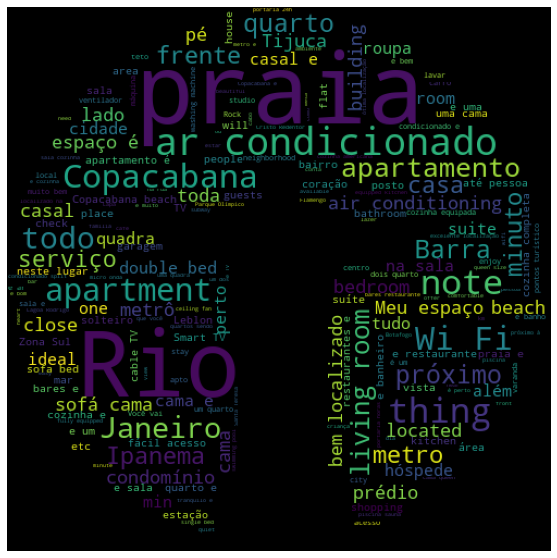

In [ ]:
# adicionando uma imagem como máscara
mask = np.array(Image.open('/content/cristo-redentor.jpg'))

# gerar uma wordcloud com algumas customizações
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      max_words = 200,
                      width=1000, height=100,
                      mask = mask, max_font_size=200,
                      min_font_size=1).generate(all_desc)
                    
#mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file('airbnb wordcloud-descrição.png')